In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import text data from csv file
df=pd.read_csv(r'C:\Users\deewa\Desktop\Data Science Class\Project and GCP\Data.csv')
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


In [3]:
pd.set_option('max_colwidth', -1)

In [4]:
df.head(10)

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1
5,10082597,599105,"Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population.",1
6,10082597,259287,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1
7,10082597,479710,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1
8,10082597,141130,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1
9,10082597,787933,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1


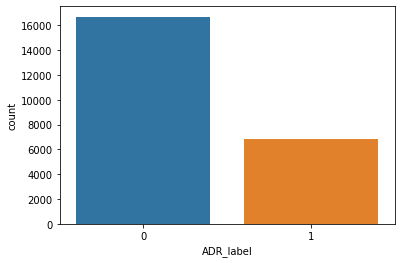

In [5]:
sns.countplot(df.ADR_label)

In [6]:
import nltk
import string
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

In [7]:
lemmatizer=WordNetLemmatizer()

In [8]:
def get_wordnet_pos(word):
    tag=nltk.pos_tag([word])[0][1][0].upper()
    tag_dict={'J':wordnet.ADJ,
              'N':wordnet.NOUN,
              'V':wordnet.VERB,
              'R':wordnet.ADV
             }
    return tag_dict.get(tag,wordnet.NOUN)

In [9]:
lemmatizer.lemmatize('striped', get_wordnet_pos('striped'))

'strip'

In [10]:
nltk.pos_tag(['hanging'])[0][1][0]

'V'

In [11]:
nltk.pos_tag(['desk'])

[('desk', 'NN')]

In [12]:
stopwords=nltk.corpus.stopwords.words('english')
print(len(stopwords))

179


In [13]:
df.Tweet[0]

'Intravenous azithromycin-induced ototoxicity.'

In [14]:
def treat_text(text):
    edited_text=re.sub('\W'," ",text) #replace any sumbol with whitespace
    edited_text=re.sub("  "," ",edited_text) #replace double whitespace with single whitespace
    edited_text=edited_text.split(" ")
    edited_text=" ".join([char for char in edited_text if char!= ""]) #remove any empty string from text
    edited_text=edited_text.lower() #lowercase
    edited_text=re.sub('\d+',"",edited_text)
    edited_text=edited_text.split()
    edited_text=" ".join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) 
                          for word in edited_text if word not in stopwords]) #apply lemmatization with POS tagging
    return edited_text

In [15]:
df['Treated_Tweet']=df.Tweet.apply(lambda x: treat_text(x))

In [16]:
df.Tweet[7]

'RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.'

In [17]:
df['Treated_Tweet'][7]

'result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand'

In [18]:
df.head(10)

,UserId,TweetId,Tweet,ADR_label,Treated_Tweet
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycin induced ototoxicity
1,10048291,528244,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1,immobilization paget bone disease present perhaps enhance activation dihydrotachysterol rifampicin could lead increase calcium release circulation
2,10048291,361834,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1,unaccountable severe hypercalcemia patient treat hypoparathyroidism dihydrotachysterol
3,10082597,292240,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1,method report two case pseudoporphyria cause naproxen oxaprozin
4,10082597,467101,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1,method report two case pseudoporphyria cause naproxen oxaprozin
5,10082597,599105,"Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population.",1,naproxen common offender associate dimorphic clinical pattern pct like presentation one simulate erythropoietic protoporphyria pediatric population
6,10082597,259287,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand
7,10082597,479710,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand
8,10082597,141130,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand
9,10082597,787933,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand


In [19]:
# Most Frequent words in the dataset
df.Treated_Tweet.str.split(expand=True).stack().value_counts()[:10]

patient      6700
case         3804
report       3129
treatment    2975
therapy      2485
year         1987
developed    1751
use          1645
drug         1514
induced      1485
dtype: int64

In [20]:
freq_words=df.Treated_Tweet.str.split(expand=True).stack().value_counts()[:10]
freq_words=list(freq_words.index)

In [21]:
df.Treated_Tweet.str.split(expand=True).stack().value_counts()[-20:]

recirculating       1
extraarticular      1
lectin              1
disqualification    1
hypopyon            1
iran                1
impinge             1
nimustine           1
mand                1
dihydroxy           1
eligible            1
immunoreactivity    1
gaussian            1
lactosamine         1
allot               1
glycopeptide        1
inhabitant          1
nci                 1
nonsmoker           1
corneum             1
dtype: int64

In [22]:
# Least Frequent words in the dataset
rare_words=df.Treated_Tweet.str.split(expand=True).stack().value_counts()
rare_words=list(rare_words.loc[lambda x: x==1].index)

In [23]:
def remove_noise_words(text):
    edited_text=text.split()
    edited_text=[word for word in edited_text if word not in freq_words]
    edited_text=[word for word in edited_text if word not in rare_words]
    edited_text=" ".join(edited_text)
    return edited_text

In [24]:
df['Final_Treated_words']=df.Treated_Tweet.apply(lambda x: remove_noise_words(x))

In [25]:
df.head(10)

,UserId,TweetId,Tweet,ADR_label,Treated_Tweet,Final_Treated_words
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycin induced ototoxicity,intravenous azithromycin ototoxicity
1,10048291,528244,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1,immobilization paget bone disease present perhaps enhance activation dihydrotachysterol rifampicin could lead increase calcium release circulation,immobilization paget bone disease present perhaps enhance activation dihydrotachysterol rifampicin could lead increase calcium release circulation
2,10048291,361834,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1,unaccountable severe hypercalcemia patient treat hypoparathyroidism dihydrotachysterol,severe hypercalcemia treat hypoparathyroidism dihydrotachysterol
3,10082597,292240,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1,method report two case pseudoporphyria cause naproxen oxaprozin,method two pseudoporphyria cause naproxen oxaprozin
4,10082597,467101,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1,method report two case pseudoporphyria cause naproxen oxaprozin,method two pseudoporphyria cause naproxen oxaprozin
5,10082597,599105,"Naproxen, the most common offender, has been associated with a dimorphic clinical pattern: a PCT-like presentation and one simulating erythropoietic protoporphyria in the pediatric population.",1,naproxen common offender associate dimorphic clinical pattern pct like presentation one simulate erythropoietic protoporphyria pediatric population,naproxen common offender associate dimorphic clinical pattern pct like presentation one simulate erythropoietic pediatric population
6,10082597,259287,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand,result old man take naproxen chronic low back pain old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand
7,10082597,479710,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand,result old man take naproxen chronic low back pain old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand
8,10082597,141130,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand,result old man take naproxen chronic low back pain old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand
9,10082597,787933,RESULTS: A 44-year-old man taking naproxen for chronic low back pain and a 20-year-old woman on oxaprozin for rheumatoid arthritis presented with tense bullae and cutaneous fragility on the face and the back of the hands.,1,result year old man take naproxen chronic low back pain year old woman oxaprozin rheumatoid arthritis present tense bulla cutaneous fragility face back hand,result old man take naproxen chron

In [26]:
df['Word_count']=df.Tweet.apply(lambda x: len(str(x).split()))

In [27]:
df['Character_count']=df.Tweet.str.len()

In [28]:
def average_word_length(sentence):
    words=sentence.split()
    return sum(len (word) for word in words)/len(words)

df['Average_word_length']=df.Tweet.apply(lambda x: average_word_length(x))

In [29]:
df['Stopword_count']=df.Tweet.apply(lambda x: len([word for word in x.split() if word in stopwords]))

In [30]:
df['Uppercase_words']=df.Tweet.apply(lambda x: len([word for word in x.split() if word.isupper()]))

In [31]:
df.head()

,UserId,TweetId,Tweet,ADR_label,Treated_Tweet,Final_Treated_words,Word_count,Character_count,Average_word_length,Stopword_count,Uppercase_words
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1,intravenous azithromycin induced ototoxicity,intravenous azithromycin ototoxicity,3,45,14.333333,0,0
1,10048291,528244,"Immobilization, while Paget's bone disease was present, and perhaps enhanced activation of dihydrotachysterol by rifampicin, could have led to increased calcium-release into the circulation.",1,immobilization paget bone disease present perhaps enhance activation dihydrotachysterol rifampicin could lead increase calcium release circulation,immobilization paget bone disease present perhaps enhance activation dihydrotachysterol rifampicin could lead increase calcium release circulation,24,190,6.958333,9,0
2,10048291,361834,Unaccountable severe hypercalcemia in a patient treated for hypoparathyroidism with dihydrotachysterol.,1,unaccountable severe hypercalcemia patient treat hypoparathyroidism dihydrotachysterol,severe hypercalcemia treat hypoparathyroidism dihydrotachysterol,11,103,8.454545,4,0
3,10082597,292240,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1,method report two case pseudoporphyria cause naproxen oxaprozin,method two pseudoporphyria cause naproxen oxaprozin,12,81,5.833333,3,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyria caused by naproxen and oxaprozin.,1,method report two case pseudoporphyria cause naproxen oxaprozin,method two pseudoporphyria cause naproxen oxaprozin,12,81,5.833333,3,1


In [32]:
df.columns

Index(['UserId', 'TweetId', 'Tweet', 'ADR_label', 'Treated_Tweet',
       'Final_Treated_words', 'Word_count', 'Character_count',
       'Average_word_length', 'Stopword_count', 'Uppercase_words'],
      dtype='object')

In [33]:
#Apply Tf-idf Vectorizer on text column seperatly and then concat with numeric columns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
tf=TfidfVectorizer()
scaler=MinMaxScaler()
text_vector=tf.fit_transform(df.Final_Treated_words)
X1=df.drop(columns=['UserId', 'TweetId', 'Tweet', 'ADR_label', 'Treated_Tweet','Final_Treated_words'], axis=1)
X1=pd.DataFrame(scaler.fit_transform(X1))
X2=pd.DataFrame(text_vector.toarray())
X=pd.concat([X1,X2], axis=1)

In [34]:
y=df.ADR_label

In [35]:
X.head()
#pd.set_option('display.max_columns',1000)

,0,1,2,3,4,0,1,2,3,4,...,9702,9703,9704,9705,9706,9707,9708,9709,9710,9711
0,0.014925,0.051701,0.673077,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.171642,0.248980,0.247596,0.236842,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.074627,0.130612,0.333916,0.105263,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.082090,0.100680,0.182692,0.078947,0.090909,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.082090,0.100680,0.182692,0.078947,0.090909,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, random_state=10)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18812, 9717)
(4704, 9717)
(18812,)
(4704,)


In [38]:
from sklearn.naive_bayes import MultinomialNB,ComplementNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

models=[]
for model in [DecisionTreeClassifier(), MultinomialNB(), ComplementNB(), 
              LogisticRegression(solver='saga'), RidgeClassifier(solver='auto'), SVC(),RandomForestClassifier()]:
    models.append(model)

In [39]:
str(models[2]).split("(")[0]

'ComplementNB'

In [ ]:
for i, model in enumerate(models):
    model.fit(X_train, y_train)
    print(str(models[i]).split("(")[0])
    print('Model fit process completed\n')

DecisionTreeClassifier
Model fit process completed

MultinomialNB
Model fit process completed

ComplementNB
Model fit process completed

LogisticRegression
Model fit process completed

RidgeClassifier
Model fit process completed



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for i, model in enumerate(models):
    print(str(models[i]).split("(")[0])
    print("\n",classification_report(y_test, model.predict(X_test)))